# <a href="https://thetahat.ru/courses/bm-2024-aut">Статистика ФБМФ</a>
## Семинар 13

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_st_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

In [ ]:
# Bot check

# HW_ID: st_sem13
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as sps

from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns

from tqdm.notebook import tqdm

import statsmodels.api as sm
import statsmodels.datasets as smd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

import warnings
warnings.filterwarnings("ignore")

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

### 1. Инициализация и обучение моделей через формулы
В этом семинаре нам понадобится модуль `statsmodels.formula.api`, который позволяет задавать модели, указав формулу в виде `target ~ features`, которая означает линейную функцию `target` от `features`.

Рассмотрим пример задания модели линейной регрессии OLS (подробнее можно почитать в [документации](https://www.statsmodels.org/dev/example_formulas.html)).


In [ ]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data
df = df[['Lottery', 'Literacy', 'Wealth', 'Region']].dropna()
df.head()

,Lottery,Literacy,Wealth,Region
0,41,37,73,E
1,38,51,22,N
2,66,13,61,C
3,80,46,76,E
4,79,69,83,E


Итак, предположим, нам нужно обучить модель для таргета `Lottery` по признакам `Literacy`, `Wealth` и `Region` из датасета выше. Тогда синтаксис будет выглядеть таким образом:

In [ ]:
model = smf.ols(formula='Lottery ~ Literacy + Wealth + Region', data=df)
res = model.fit()

Метод `fit` возвращает объект типа `statsmodels.regression.linear_model.RegressionResults`, который содержит различные характеристики модели:
* в первой секции представлены различные характеристики самой модели
  * параметры обучения,
  * $R^2$
  * проверка гипотезы о значимости регрессии в целом
  * логарифмическая функция правдоподобия
  * информационные критерии
* во второй секции &mdash; подробная информация о коэффициентах, включая анализ их стат. значимости:
  * названия коэффициентов (совпадают с именами признаков, или `Intercept` для свободного коэффициента);
  * оценки коэффициентов;
  * стандартные ошибки &mdash; корень из оценки дисперсии оценки каждого из коэффициентов;
  * t-статистика для проверки гипотезы о незначимости коэффициента;
  * p-value критерия для проверки гипотезы о незначимости коэффициента (правило: если $\text{p-value} \leqslant \alpha=0.05$, то гипотеза отвергается, иначе &mdash; не отвергается);
  * левая и правая граница 95\% доверительного интервала для коэффициента.
* в третьей секции &mdash; анализ остатков модели
  * критерии проверки несмещенности, нормальности

*Подробнее:* https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html

Посмотрим на результат **в предположении гомоскедастичности**

In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           1.07e-05
Time:                        15:19:00   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

Заметим, что модель автоматически добавила свободный член (`Intercept`) и рассмотрела признак `Region` как категориальный, затем удалив одну из категорий (`С`). Так произошло, потому что значения были строками. При этом, если бы мы имели целочисленный призак и хотели бы рассмотреть его как категориальный, то заключили бы его в `C()` при передаче в формулу. То есть, чтобы специфически указать, что признак категориальный, вот так:


In [ ]:
model = smf.ols(formula='Lottery ~ Literacy + Wealth + C(Region)', data=df)
res = model.fit()
print(res.params)

Intercept         38.651655
C(Region)[T.E]   -15.427785
C(Region)[T.N]   -10.016961
C(Region)[T.S]    -4.548257
C(Region)[T.W]   -10.091276
Literacy          -0.185819
Wealth             0.451475
dtype: float64


*Примечение:* Во всех моделях ниже нас будет интересовать коэффициент при параметре, определяющим принадлежность к А или В группе, а также p-value для него.

### 2. Использование признаков

**Задача:** исследовать влияние отправки email с напоминанием о долге. Таргет &mdash; сумма платежей от клиентов, которые просрочили платеж.

Выбраны 5000 случайных клиентов для проведения рандомизированного эксперимента. Каждый клиент получает электронное письмо случайно с вероятностью 0.5, а значит случайным образом распределяется в одну из групп.

Загрузим данные collections_email.csv из [репозитория](https://github.com/matheusfacure/python-causality-handbook/blob/master/causal-inference-for-the-brave-and-true/data/collections_email.csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATA_PATH = "/content/drive/MyDrive/colab_data/collections_email.csv"

In [ ]:
data = pd.read_csv(DATA_PATH)
data.head()

,payments,email,opened,agreement,credit_limit,risk_score
0,740,1,1.0,0.0,2348.495260,0.666752
1,580,1,1.0,1.0,334.111969,0.207395
2,600,1,1.0,1.0,1360.660722,0.550479
3,770,0,0.0,0.0,1531.828576,0.560488
4,660,0,0.0,0.0,979.855647,0.455140


Проведите АВ-тесты, чтобы оценить различие между группами (`email`) по таргету (`payments`), двумя способами: с помощью `ttest_ind` и модели OLS. Сравните результаты и сделайте выводы.

In [ ]:
# классический ttest
# Анализ с помощью t-теста
email_group = data[data['email'] == 1]['payments']
no_email_group = data[data['email'] == 0]['payments']

t_statistic, p_value = sps.ttest_ind(email_group, no_email_group)
print(f"t-статистика: {t_statistic:.2f}")
print(f"p-value: {p_value:.3f}")

t-статистика: -0.21
p-value: 0.833


In [ ]:
model = smf.ols('payments ~ email', data=data).fit() # реализация OLS
print(model.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    669.9764      2.061    325.116      0.000     665.937     674.016
email         -0.6203      2.941     -0.211      0.833      -6.387       5.146


**Вывод:** P-value = 0.833 > alpha = 0.05 следовательно отвергнуть нулевую гипотезу не можем

Обратим внимание на p-value. Что делать? Вернуться к заказчику, поджав хвост, и сказать, что эксперимент безрезультатен и нужно больше данных?

Но посмотрим на другие признаки

* `credit_limit` &mdash; кредитный лимит клиента до того, как он просрочил платеж;
* `risk_score` &mdash; предполагаемый риск для клиента до момента отправки email.


Добавьте их в качестве признаков и обучите модель


In [ ]:
model_2 = smf.ols('payments ~ email + credit_limit + risk_score', data=data).fit() # реализация OLS
print(model_2.summary().tables[1])

                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      490.8653      9.715     50.527      0.000     471.820     509.911
email            4.4304      2.130      2.080      0.038       0.255       8.606
credit_limit     0.1511      0.008     18.833      0.000       0.135       0.167
risk_score      -8.0516     38.424     -0.210      0.834     -83.379      67.276


Заметим, что можно извлечь результаты отдельных тестов, например, проверку гипотезы о незначимости коэффициента перед признаком `email`

In [ ]:
result = model_2.t_test('email = 0')
result

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             4.4304      2.130      2.080      0.038       0.255       8.606

Рассмотренные признаки *могут объяснить разброс значений таргета*, снизив тем самым его дисперсию. Кроме того, они *не влияют* на принадлежность к группе, тем самым не могут внести смещение.

**Вывод:**

Благодаря такому тесту с учётом нескольких признаков получили p-value, по которому можем отвергнуть нулевую гипотезу для email и credit_limit,  значит статистически они влияют на целевую переменную.


## Статистические свойства линейной регрессии

Загрузим датасет с данными по стоимости квартир в Москве (<a href="https://raw.githubusercontent.com/bdemeshev/em301/master/datasets/flats_moscow.txt">источник</a>).

In [ ]:
!wget https://raw.githubusercontent.com/bdemeshev/em301/master/datasets/flats_moscow.txt

--2024-11-28 15:56:22--  https://raw.githubusercontent.com/bdemeshev/em301/master/datasets/flats_moscow.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64916 (63K) [text/plain]
Saving to: ‘flats_moscow.txt’

flats_moscow.txt    100%[===================>]  63.39K  --.-KB/s    in 0.02s   

2024-11-28 15:56:23 (2.97 MB/s) - ‘flats_moscow.txt’ saved [64916/64916]



In [ ]:
flats = pd.read_csv("flats_moscow.txt", sep='\t')
flats.head()

,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3


Будем рассматривать зависимость цены квартиры от ее площади.

### 1. Обучение простой линейной модели

Сначала обучим линейную регрессию `OLS` предсказания стоимости квартиры по ее площади по аналогии с предыдущими пунктами.

In [ ]:
model_flat = smf.ols('price	 ~ totsp', data=flats).fit() # реализация OLS

Посмотрим на результаты модели, полученные **в предположении гомоскедастичности**.

In [ ]:
print(model_flat.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     2719.
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:07:03   Log-Likelihood:                -10085.
No. Observations:                2040   AIC:                         2.017e+04
Df Residuals:                    2038   BIC:                         2.019e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -62.0448      3.712    -16.716      0.0

Можно извлечь результаты отдельных тестов, например, проверка гипотезы о незначимости коэффициента перед признаком `totsp`.

In [ ]:
result = model_flat.t_test('totsp = 0')
result

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             2.5935      0.050     52.146      0.000       2.496       2.691

Посмотрите, как зависят стюдентизированные остатки обученной модели (посмотрите функцию `outlier_test()`) от общей площади квартиры

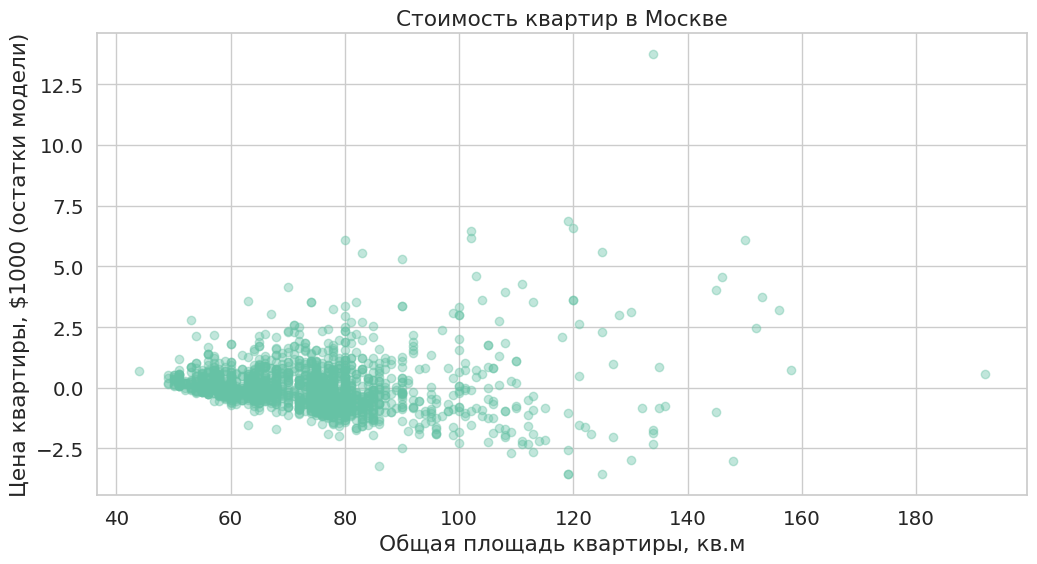

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(flats['totsp'], model_flat.outlier_test()['student_resid'], alpha=0.4)
plt.title('Стоимость квартир в Москве')
plt.xlabel('Общая площадь квартиры, кв.м')
plt.ylabel('Цена квартиры, $1000 (остатки модели)');

По графику явно видна гетероскедастичность.

*Примечание.* Если **хотя бы по одному** признаку, используемому в модели, видна разная дисперсия остатков, то имеет смысл говорить о гетероскедастичности.

### 2. Использование устойчивых оценок дисперсии

*При наличии подозрений на гетероскедастичность рекомендуется сразу использовать устойчивые оценки дисперсии, не применяя проверку на гетероскедастичность стат. критериями. Критерии также имеют свои ошибки, и последовательное применение нескольких критериев может суммировать вероятности ошибок.*

Получите оценку ковариационной матрицы вектора $\widehat{\theta}$ в условиях гетероскедастичности. Возьмите `cov_type="HC3"` у метода `fit` модели и посмотрите на результат. Интерпретация значений в таблицах аналогична, см. пояснения выше.

In [ ]:
model_flat_2 = smf.ols('price ~ totsp', data=flats).fit(cov_type='HC3')
print(model_flat_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     516.0
Date:                Thu, 28 Nov 2024   Prob (F-statistic):          5.24e-102
Time:                        16:22:56   Log-Likelihood:                -10085.
No. Observations:                2040   AIC:                         2.017e+04
Df Residuals:                    2038   BIC:                         2.019e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -62.0448      7.859     -7.895      0.0

**Вопрос:** Что изменилось при использовании поправки на гетероскедатичность?

**Ответ:**

После поправки на гетероскедатичность уменьшилось p-value и статистика, что логично, так как не учитывая этот фактор мы зачастую занижаем p-value.